In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

In [2]:
def plot(y_true, y_pred, normalize = False, border = 100):
    fig = plt.figure(figsize=(18,12))
    # set up subplot grid
    gridspec.GridSpec(2,2)
    
    #Normalization of real and predicted values to 1
    if normalize:
        border = 1
        y_true /= max(copy.copy(y_true))
        y_pred /= max(copy.copy(y_pred))
    
    #Big subplot with diagonal plot
    plt.subplot2grid((2,3), (0,0), colspan=2, rowspan=2)
    plt.xlim(0, border)
    plt.ylim(0, border)
    plt.scatter(y_true, y_pred, c = 'k', s = 10, marker = 's')
    plt.plot([0, border], [0, border], c = 'red', alpha = 0.6)
    plt.plot([0, border * 1/1.15], [0, border], color = 'black', alpha = 0.6, linewidth = 2, linestyle = '--')
    plt.plot([0, border], [0, border * 0.85], color = 'black', alpha = 0.6, linewidth = 2, linestyle = '--')
    plt.xlabel('Реальные значения', fontsize = 20)
    plt.ylabel('Прогнозные значения', fontsize = 20)
    plt.tick_params(labelsize = 20)
    plt.grid()
    
    #Subplot with histogramms for real and predicted values
    plt.subplot2grid((2,3), (0,2))
    plt.hist(y_true, alpha = 0.5, bins = 100, label = 'Реальные значения')
    plt.hist(y_pred, color = 'red', alpha = 0.5, bins = 100, label = 'Прогноз')
    plt.title('Распределения прогнозного параметра', fontsize = 16)
    plt.tick_params(labelsize = 16)
    plt.legend(fontsize = 16)
    
    #Subplot with difference histogramm of real and predicted values
    plt.subplot2grid((2,3), (1,2))
    plt.hist(y_true - y_pred, color = 'blue', alpha = 0.75, bins = 100)
    plt.title('Распределение отклонения прогноза от реальности', fontsize = 16)
    plt.tick_params(labelsize = 16)

In [3]:
path_gas_test = 'Geochemistry Data/CNS_gas_test.csv'
path_gas_train = 'Geochemistry Data/CNS_gas_train.csv'
path_rock_samples = 'Geochemistry Data/CNS rock samples.csv'
path_rock_samples = 'Geochemistry Data/CNS oil.csv'
df_test = pd.read_csv(path_gas_test, skiprows = [1], header = 0)
df_train = pd.read_csv(path_gas_train, skiprows = [1], header = 0)
df_rock = pd.read_csv(path_rock_samples, skiprows = [1], header = 0)
df_oil = pd.read_csv(path_rock_samples, skiprows = [1], header = 0)

In [4]:
df_train['WH_SPUD_DATE_upd'] = pd.to_datetime(df_train['WH_SPUD_DATE'], format='%d/%m/%Y %H:%M', errors='coerce')
mask = df_train['WH_SPUD_DATE_upd'].isnull()
df_train.loc[mask, 'WH_SPUD_DATE_upd'] = pd.to_datetime(df_train[mask]['WH_SPUD_DATE'],
                                                        format='%d-%m-%y %H:%M', errors='coerce')
df_train['WH_SPUD_DATE'] = df_train['WH_SPUD_DATE_upd']

df_train['WH_COMP_DATE_upd'] = pd.to_datetime(df_train['WH_COMP_DATE'], format='%d/%m/%Y %H:%M', errors='coerce')
mask = df_train['WH_COMP_DATE_upd'].isnull()
df_train.loc[mask, 'WH_COMP_DATE_upd'] = pd.to_datetime(df_train[mask]['WH_COMP_DATE'],
                                                        format='%d-%m-%y %H:%M', errors='coerce')
df_train['WH_COMP_DATE'] = df_train['WH_COMP_DATE_upd']

In [5]:
df_test['WH_SPUD_DATE'] = pd.to_datetime(df_test['WH_SPUD_DATE'], format='%m/%d/%Y %H:%M')
df_test['WH_COMP_DATE'] = pd.to_datetime(df_test['WH_COMP_DATE'], format='%m/%d/%Y %H:%M')

df_oil['WH_SPUD_DATE'] = pd.to_datetime(df_oil['WH_SPUD_DATE'], format='%b %d, %Y')
df_oil['WH_COMP_DATE'] = pd.to_datetime(df_oil['WH_COMP_DATE'], format='%b %d, %Y')

In [6]:
intersections = list(set(df_oil['WELL_NAME'].tolist()) & set(df_train['WELL_NAME'].tolist()))
len(intersections)

116

In [8]:
len(df_train['WELL_NAME'])

1709

In [71]:
df_test.isna().sum()[df_test.isna().sum() < 50]

Country                0
WELL_NAME              0
OGA Well Name          0
WH_SITETYPE            0
WH_FIELD               2
WH_BLOCK               0
WH_LAT                 2
WH_LONG                2
WH_COORD_SYS           2
WH_OPERATOR            2
WH_SPUD_DATE           2
WH_SPUD_YEAR           2
WH_COMP_DATE          18
WH_TD_M                2
WH_DR_ELEV_M           2
WH_DEPTH_REF           2
SAMPLE_ID              0
SH_DEPTH_TOP_FT        0
SH_DEPTH_BOT_FT        0
SH_SAMPLE_TYPE         0
SH_SAMPLE_SUB_TYPE     0
SH_ORIG               18
SH_TREATMENT           0
SH_CDATE              38
SH_COMMENT             7
GAS_METHOD             0
GAS_LAB                0
GAS_ACQ_DATE           0
GAS_C6PLUS            49
GAS_CO2               45
GAS_N2                48
D_G_METHOD             8
D_G_LAB                8
D_G_DATA_TYPE         22
D_G_ACQ_DATE          26
CSIA_NC1               9
CSIA_NC2              15
CSIA_NC3              22
CSIA_IC4              24
CSIA_NC4              22


In [83]:
df_train['WH_LAT'].shape

(1709,)

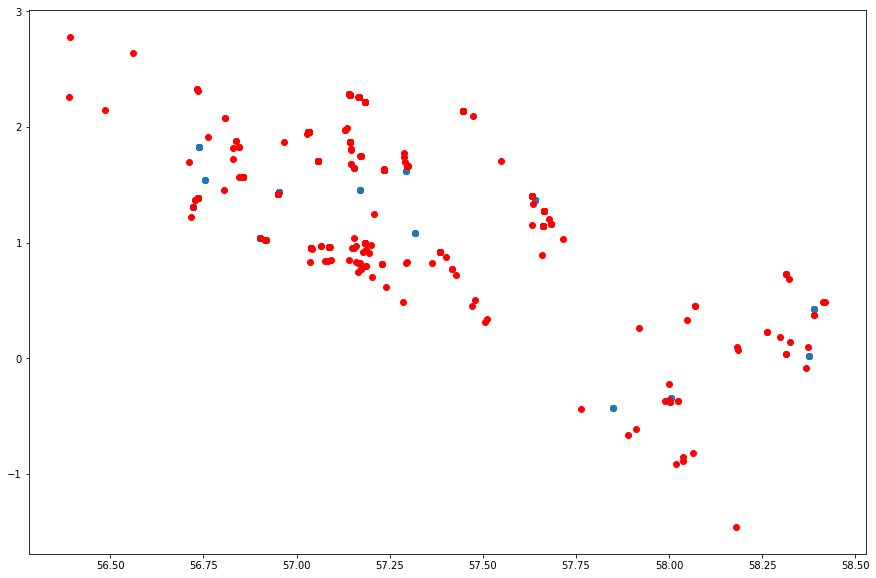

In [83]:
plt.figure(figsize = (15, 10))
plt.scatter(df_test['WH_LAT'], df_test['WH_LONG'])
plt.scatter(df_train['WH_LAT'], df_train['WH_LONG'], color = 'red')

In [115]:
df_train['GAS_C1'][df_train['WH_COMP_DATE'].dropna().index].iloc[0]

78.88

In [90]:
len(df_train['WH_COMP_DATE'].dropna())

816

In [119]:
df_train['WH_COMP_DATE'].dropna().toordinal()

AttributeError: 'Series' object has no attribute 'toordinal'

TypeError: invalid type promotion

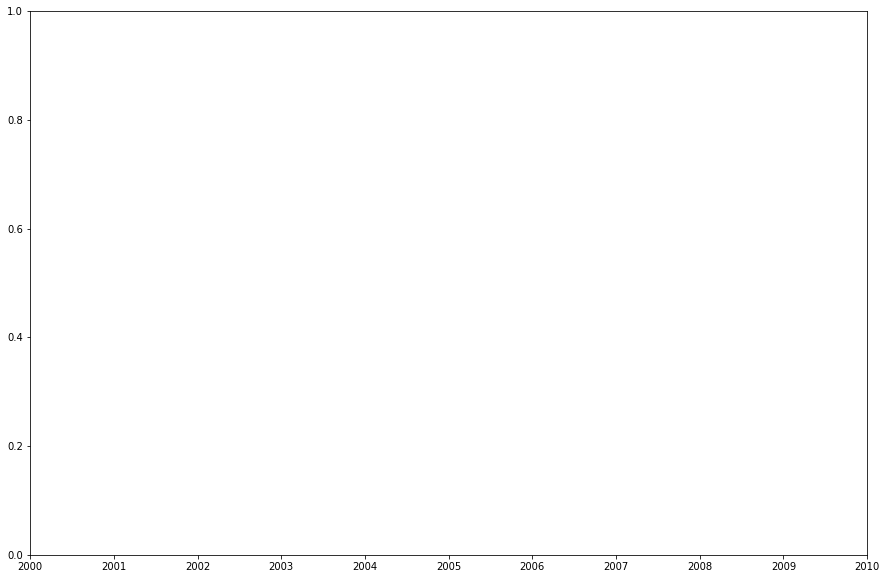

In [92]:
plt.figure(figsize = (15, 10))
# plt.scatter(df_test['WH_LAT'], df_test['WH_LONG'])
plt.scatter(df_train['WH_COMP_DATE'].dropna(), df_train['GAS_C1'][df_train['WH_COMP_DATE'].dropna().index], color = 'red')
plt.grid()
plt.show()

In [78]:
for col in df_test.isna().sum()[df_test.isna().sum() < 50].index.to_list():
    print('COL NAME', col)
    print(df_test[col].to_list())
    print('__________________________')

COL NAME Country
['United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Ki

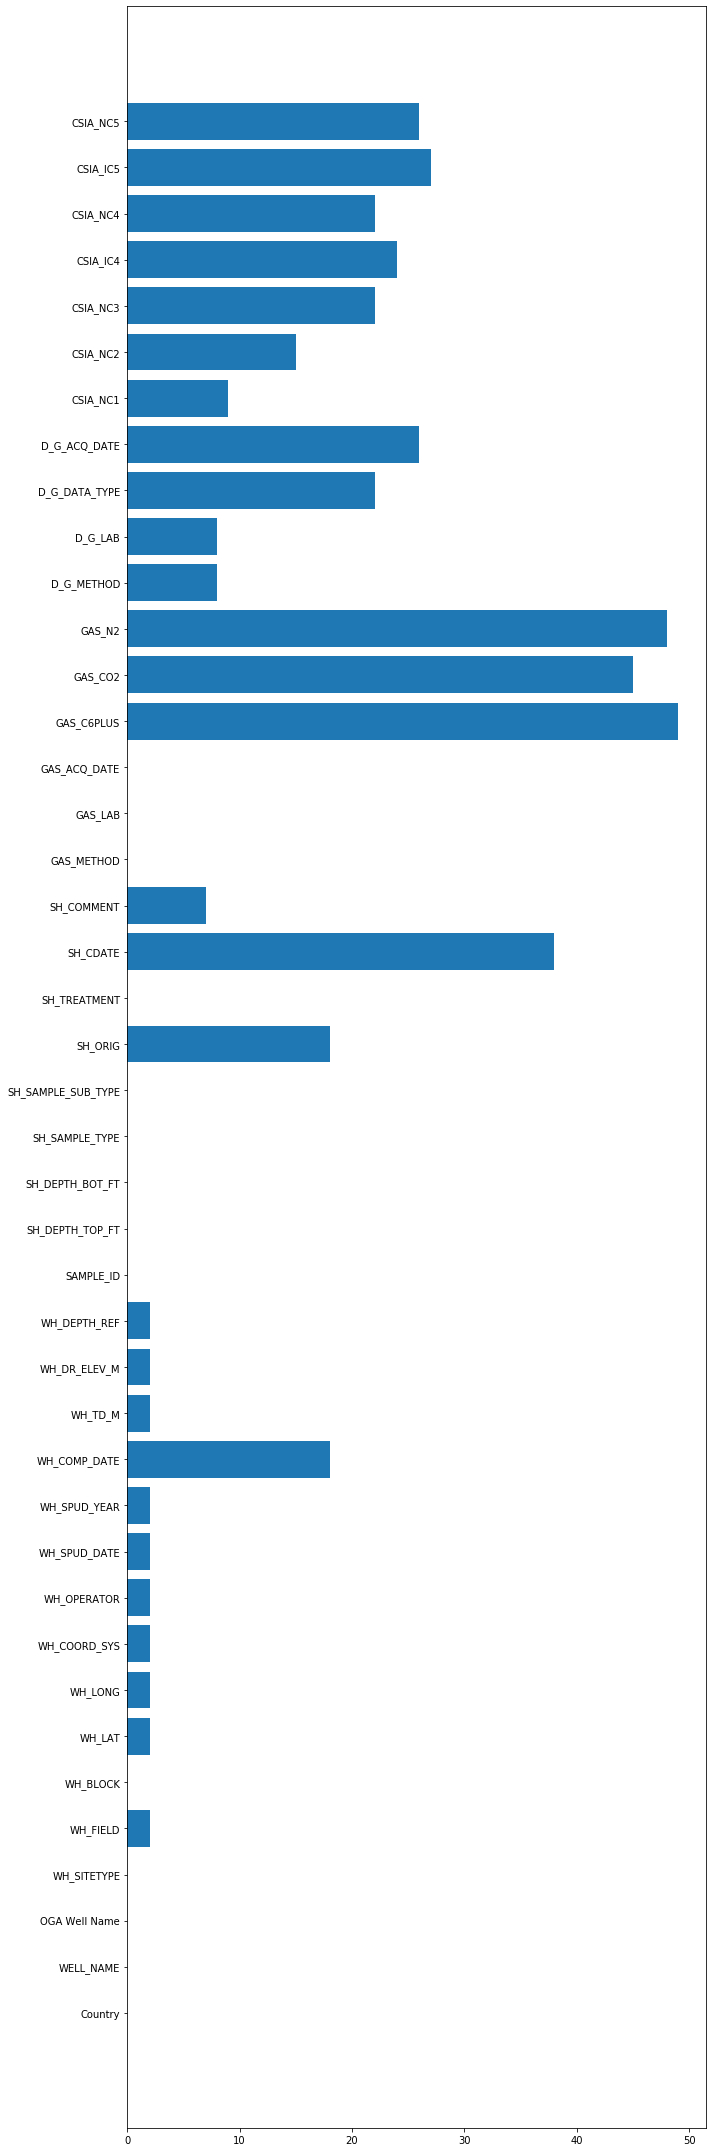

In [65]:
plt.figure(figsize = (10, 30))
plt.barh(df_test.isna().sum()[df_test.isna().sum() < 50].index,
         df_test.isna().sum()[df_test.isna().sum() < 50].values)
plt.tight_layout()
plt.savefig('diag.png')

In [135]:
cols = [
    'WH_LAT', 'WH_LONG', 'WH_TD_M', 'WH_DR_ELEV_M', 'WH_DEPTH_REF', 'SH_DEPTH_TOP_FT', 'SH_DEPTH_BOT_FT',
    'SH_SAMPLE_TYPE', 'SH_SAMPLE_SUB_TYPE', 'SH_ORIG', 'GAS_LAB', 'CSIA_NC1', 'CSIA_NC2', 'CSIA_NC3',
    'CSIA_IC4', 'CSIA_NC4', 'CSIA_IC5', 'CSIA_NC5'
]

cols = [
    'WH_LAT', 'WH_LONG', 'WH_TD_M', 'SH_DEPTH_TOP_FT', 'SH_DEPTH_BOT_FT', 'CSIA_CONC_C1', 'CSIA_NC1', 'CSIA_NC2',
       'CSIA_NC3', 'CSIA_IC4', 'CSIA_NC4', 'CSIA_IC5', 'CSIA_NC5'
]
X_test = df_test[cols]
X_train = df_train[cols]

y_train = df_train[['GAS_C1', 'GAS_C2', 'GAS_C3', 'GAS_IC4', 'GAS_NC4', 'GAS_IC5', 'GAS_NC5']]

In [111]:
df_train[df_train.duplicated()]

,Country,WELL_NAME,OGA Well Name,WH_SITETYPE,WH_FIELD,WH_BLOCK,WH_LAT,WH_LONG,WH_COORD_SYS,WH_OPERATOR,...,DD_G_H2,DN_G_N2,DD_G_GAS,DD_G_NC1,DD_G_NC2,DD_G_NC3,DD_G_IC4,DD_G_NC4,DD_G_IC5,DD_G_NC5


In [105]:
y_train.iloc[:, 0]

0       75.50
1       75.40
2       99.80
3       99.40
4       99.40
        ...  
1704    87.40
1705    87.70
1706    87.70
1707    61.41
1708    76.08
Name: GAS_C1, Length: 1709, dtype: float64

In [125]:
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputRegressor as MOR
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
import xgboost as xgb

In [136]:
for col in X_test.dtypes[X_test.dtypes == 'object'].index:
    X_train[col] = X_train[col].where(X_train[col] == X_train[col], 'No data')
    X_test[col] = X_test[col].where(X_test[col] == X_test[col], 'No data')
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.fit_transform(X_test[col])

In [141]:
y_pred = cross_val_predict(xgb.XGBRegressor(objective = 'reg:squarederror'), X_train, y_train.iloc[:, 1], cv  = 5)

C:\Users\andrei.erofeev\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [142]:
cross_val_score(xgb.XGBRegressor(objective = 'reg:squarederror'), X_train, y_train.iloc[:, 1], cv  = 5, scoring = 'r2')

C:\Users\andrei.erofeev\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\andrei.erofeev\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\andrei.erofeev\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\andrei.erofeev\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


array([0.34807463, 0.18001843, 0.01967697, 0.34799505, 0.25660266])

In [143]:
r2_score(y_train.iloc[:, 1], y_pred)

0.28315430689449217

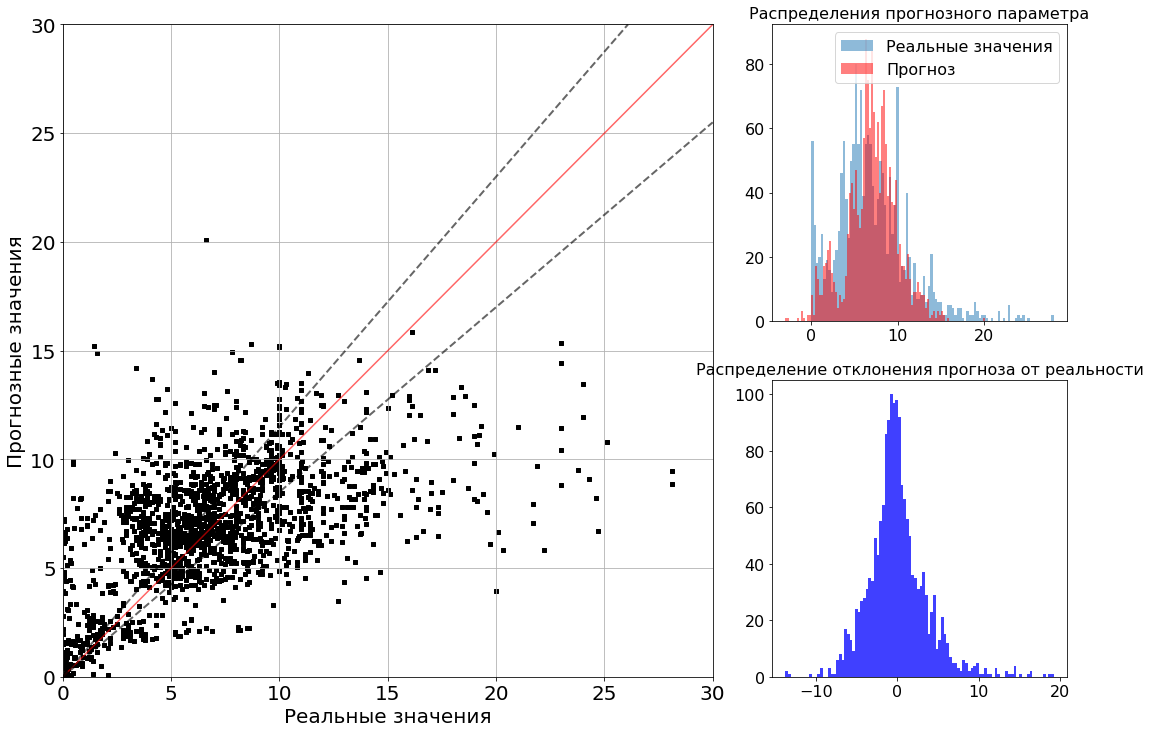

In [145]:
plot(y_train.iloc[:, 1], y_pred, border = 30)

In [160]:
regr = xgb.XGBRegressor()
regr.fit(X_train, y_train.iloc[:, 3])

[20:14:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

<BarContainer object of 13 artists>

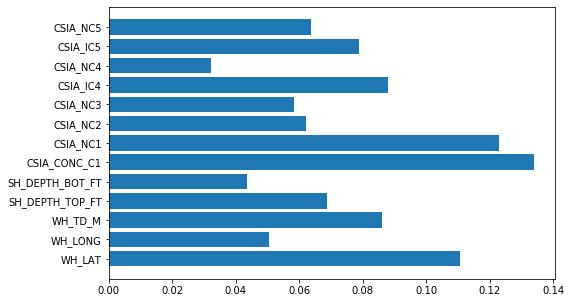

In [161]:
plt.figure(figsize=(8,5))
plt.yticks(np.arange(len(regr.feature_importances_)), X_train.columns.values,rotation='horizontal')
plt.barh(np.arange(len(regr.feature_importances_)), regr.feature_importances_, 
         label = 'iMP')

In [153]:
regr.feature_importances_

array([0.10988022, 0.05390708, 0.08290531, 0.04476979, 0.06224013,
       0.06416394, 0.22592242, 0.12678215, 0.07772355, 0.02905894,
       0.07023916, 0.02557136, 0.02683595], dtype=float32)

## Anya

In [29]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [58]:
def RegressionModelScores(model, true_values, predictions, give_coeff=False):
    print("Sqrt of mean squared error: %.4f"
          % mean_squared_error(true_values, predictions) ** 0.5)
    print("Mean absolute error: %.4f"
          % mean_absolute_error(true_values, predictions))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.4f' % r2_score(true_values, predictions))
#     plt.hist(model.coef_);
#     if give_coeff:
#         return model.coef_

In [75]:
cols = [
    'WH_LAT', 'WH_LONG', 'WH_TD_M', 'WH_DR_ELEV_M', 'WH_DEPTH_REF', 'SH_DEPTH_TOP_FT', 'SH_DEPTH_BOT_FT',
    'SH_SAMPLE_TYPE', 'SH_SAMPLE_SUB_TYPE', 'SH_ORIG', 'GAS_LAB', 'CSIA_NC1', 'CSIA_NC2', 'CSIA_NC3',
    'CSIA_IC4', 'CSIA_NC4', 'CSIA_IC5', 'CSIA_NC5'
]

cols = [
    'WH_LAT', 'WH_LONG', 'CSIA_CONC_C1', 'CSIA_NC1'
]

X_train = df_train[cols]

y_train = df_train[['GAS_C1', 'GAS_C2', 'GAS_C3', 'GAS_IC4', 'GAS_NC4', 'GAS_IC5', 'GAS_NC5']]

X_train = X_train.dropna()
y_train = y_train.iloc[:, 1][X_train.dropna().index]
y_train_log = np.log(y_train/np.max(y_train))

In [76]:
# Linear Regression
ols = LR(fit_intercept=True, normalize=False)
ols.fit(X_train, y_train_log)
train_prediction = ols.predict(X_train)

RegressionModelScores(ols, y_train_log, train_prediction, give_coeff=True)

Sqrt of mean squared error: 0.5883
Mean absolute error: 0.4346
Variance score: 0.5318


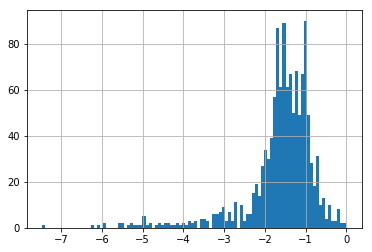

In [77]:
y_train_log.hist(bins=100)

In [78]:
from sklearn.ensemble import RandomForestRegressor

### BEGIN Solution
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train_log)
### END Solution

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [79]:
train_prediction = random_forest.predict(X_train)

RegressionModelScores(random_forest, y_train_log, train_prediction)#, give_coeff=True)

Sqrt of mean squared error: 0.1216
Mean absolute error: 0.0806
Variance score: 0.9800


In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_scores = pd.DataFrame(columns=['Random Forest'], index=X_train.keys().values)
feature_scores['Random Forest'] = scaler.fit_transform(random_forest.feature_importances_.reshape(-1, 1))

In [57]:
feature_scores

,Random Forest
WH_LAT,0.107630
WH_LONG,0.000000
CSIA_CONC_C1,0.205789
CSIA_NC1,1.000000
